# NumPy 기본 : 배열과 벡터 연산

**************
- ndarray는 빠른 배열 계산과 유연한 브로드캐스팅 기능 제공
- 반복문을 작성할 필요 없이 전체 데이터 배열을 빠르게 계산 가능
- 배열 데이터를 디스크에 쓰거나 읽을 수 있는 도구와 메모리에 적재된 파일을 다루는 도구
- 선형대수, 난수 생성기, 푸리에 변환 기능
- C, C++, 포트란으로 작성한 코드를 연결할 수 있는 C API

**=> Numpy 배열과 배열 기반 연산에 대한 이해를 한 다음 pandas 같은 배열 기반 도구를 사용하면 훨씬 더 효율적** 

**********************
- NumPy는 대용량 데이터 배열을 효율적으로 다룰 수 있다.
    - 데이터를 다른 내장 파이썬 객체와 구분된 연속된 메모리 블록에 저장한다. 
    - 각종 알고리즘은 모두 C로 작성. 
    - 더 적은 메모리를 사용.
    - 반복문을 사용하지 않고, 전체 배열에 대한 복잡한 계산 수행 가능.

In [1]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [2]:
import numpy as np
# NumPy 배열과 파이썬 리스트를 비교
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [3]:
%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 8.99 ms, sys: 16.5 ms, total: 25.5 ms
Wall time: 23.5 ms
CPU times: user 557 ms, sys: 220 ms, total: 777 ms
Wall time: 777 ms


- NumPy를 사용한 코드가 순수 파이썬으로 작성한 코드보다 빠르다.

**************************
## The NumPy ndarray: 다차원 배열 객체

In [4]:
import numpy as np
# 임의의 값을 생성
data = np.random.randn(2, 3)
data

array([[-0.2047,  0.4789, -0.5194],
       [-0.5557,  1.9658,  1.3934]])

In [5]:
# 모든 원소에 10을 곱
data * 10
# data 배열에서 같은 위치의 값끼리 더하기
data + data

array([[-0.4094,  0.9579, -1.0389],
       [-1.1115,  3.9316,  2.7868]])

In [6]:
# 튜플과 배열에 저장된 자료형을 알려주는
data.shape
data.dtype

dtype('float64')

### 4.1.1 ndarrary 생성하기

In [7]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [8]:
# 같은 길이를 가지는 리스트를 내포하고 있는 순차 데이터는 다차원 배열로 변환 가능.
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [14]:
arr2.ndim

2

In [15]:
arr2.shape

(2, 4)

In [12]:
arr1.dtype

dtype('float64')

In [13]:
arr2.dtype

dtype('int64')

In [16]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [18]:
np.empty((2, 3, 2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [19]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

*******************
### 4.1.2 ndarray의 dtype

- dtype은 ndarray가 메모리에 있는 특정 데이터를 해석하기 위해 필요한 정보(**메타데이터**)를 담고 있는 특수한 객체.
    
    - '메타데이터' : 목적을 가지고 만들어진 데이터

In [21]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype

dtype('float64')

In [22]:
arr2.dtype

dtype('int32')

In [23]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

- astype 메서드를 사용해서 배열의 dtype을 다른 형으로 변환(또는 캐스팅) 가능하다.

In [26]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)
# 부동 소수점수를 정수형 dtype으로 변환하며 소수점 아래 자리는 버려진다. => 12.9에서 12로

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

- NumPy에서 문자열 데이터는 고정 크기를 가지며, 별다른 경고를 출력하지 않고 입력을 임의로 잘라낼 수 있다. 따라서 numpy.string_형 주의

In [29]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
# 숫자 형식의 문는 배열이 있다면 astype을 사용하여 숫자로 변환 가능
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [31]:
# 다른 배열의 dtype 속성 이용 가능.
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [32]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

*****************
### 4.1.3 NumPy 배열의 산술 연산

In [34]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [35]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [36]:
1 / arr

array([[1.    , 0.5   , 0.3333],
       [0.25  , 0.2   , 0.1667]])

In [37]:
arr ** 0.5

array([[1.    , 1.4142, 1.7321],
       [2.    , 2.2361, 2.4495]])

In [38]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2
# 같은 크기를 가지는 배열 간의 비교 연산은 불리언 배열로 반환
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

- 크기가 다른 배열 간의 연산은 브로드캐스팅이라고 한다.
************************

### 4.1.4 Basic Indexing and Slicing (색인과 슬라이싱 기초)

In [39]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
arr[5]

5

In [41]:
arr[5:8]

array([5, 6, 7])

In [42]:
# 배열 조각에 스칼라 값을 대입하면, 12가 선택 영역 전체로 전파(브로드캐스팅)된다.
arr[5:8] = 12

In [43]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

- 리스트와의 차이점은 배열 조각은 원본 배열의 뷰이다.(얕은 복사) => 데이터는 복사 되지 않고 뷰에 대한 변경은 그대로 원본 배열에 반영.

In [44]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [46]:
# arr_slice의 값을 변경하면 원래 배열인 arr의 값도 바뀜
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [47]:
# [:]로 슬라이스를 하면 배열의 모든 값에 할당
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [48]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

- 0번 축을 '로우'로 생각, 1번 축을 '컬럼'으로 생각.

In [49]:
arr2d[0][2]

3

In [50]:
arr2d[0, 2]

3

In [51]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [52]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [53]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [54]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [60]:
arr3d[0, 1]

array([4, 5, 6])

In [61]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [63]:
x[1]

array([10, 11, 12])

- 선택된 배열의 부분집합은 모두 배열의 뷰를 반환한다.

*******************
#### Indexing with slices (슬라이스로 선택하기)

In [64]:
arr
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [65]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [66]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [67]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [68]:
# 두 번째 로우에서 처음 두 컬럼만 선택
arr2d[1, :2]

array([4, 5])

In [69]:
# 두 로우에서 세 번째 컬럼만 선택
arr2d[:2, 2]

array([3, 6])

In [70]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [71]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### 4.1.5 Boolean Indexing(불리언값으로 선택하기)

In [72]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [73]:
data

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 1.669 , -0.4386, -0.5397,  0.477 ],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

In [74]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [75]:
data[names == 'Bob']

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.669 , -0.4386, -0.5397,  0.477 ]])

- 불리언값으로 배열을 선택할 때는 배열의 크기가 달라도 실패하지 않는다.

In [76]:
#'Bob'인 로우에서 2: 컬럼 선택
data[names == 'Bob', 2:]

array([[ 0.769 ,  1.2464],
       [-0.5397,  0.477 ]])

In [77]:
data[names == 'Bob', 3]

array([1.2464, 0.477 ])

In [78]:
#'Bob'이 아닌 요소 선택 ! 사용
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [79]:
# ~ 사용 조건절 부인
data[~(names == 'Bob')]

array([[ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

In [80]:
cond = names == 'Bob'
data[~cond]

array([[ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

- and와 or는 불리언 배열에서 사용 불가. &(and)과 |(or) 사용

In [82]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [83]:
data[mask]

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 1.669 , -0.4386, -0.5397,  0.477 ],
       [ 3.2489, -1.0212, -0.5771,  0.1241]])

In [84]:
data[data < 0] = 0
data

array([[0.0929, 0.2817, 0.769 , 1.2464],
       [1.0072, 0.    , 0.275 , 0.2289],
       [1.3529, 0.8864, 0.    , 0.    ],
       [1.669 , 0.    , 0.    , 0.477 ],
       [3.2489, 0.    , 0.    , 0.1241],
       [0.3026, 0.5238, 0.0009, 1.3438],
       [0.    , 0.    , 0.    , 0.    ]])

In [85]:
data[names != 'Joe'] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [1.0072, 0.    , 0.275 , 0.2289],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.3026, 0.5238, 0.0009, 1.3438],
       [0.    , 0.    , 0.    , 0.    ]])

### 4.1.6 Fancy Indexing(팬시 색인)

In [86]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [87]:
# [[]]를 써서 각 행 별로 추출가능
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [88]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [89]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [90]:
# (1,0), (5,3), (7,1), (2,2)에 대응하는 '원소'들 선택
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [91]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

- 팬시 색인은 선택된 데이터를 새로운 배열로 복사한다.

### 4.1.7 Transposing Arrays and Swapping Axes(배열 전치와 축 바꾸기)

In [93]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [94]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [95]:
arr = np.random.randn(6, 3)
arr

array([[-0.8608,  0.5601, -1.2659],
       [ 0.1198, -1.0635,  0.3329],
       [-2.3594, -0.1995, -1.542 ],
       [-0.9707, -1.307 ,  0.2863],
       [ 0.378 , -0.7539,  0.3313],
       [ 1.3497,  0.0699,  0.2467]])

In [96]:
# 행렬의 내적
np.dot(arr.T, arr)

array([[ 9.2291,  0.9394,  4.948 ],
       [ 0.9394,  3.7662, -1.3622],
       [ 4.948 , -1.3622,  4.3437]])

In [97]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [106]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [107]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [108]:
# 두 개의 축 번호를 받아서 배열을 뒤바꾼다.
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

************************
## 4.2 Universal Functions: Fast Element-Wise Array Functions (유니버설 함수 : 배열의 각 원소를 빠르게 처리하는 함수)

- 하나 이상의 스칼라값을 받아서 하나 이상의 스칼라 결괏값을 반환하는 함수를 고속으로 수행 가능한 **벡터화된 래퍼 함수**

In [109]:
arr = np.arange(10)
arr
np.sqrt(arr)

array([0.    , 1.    , 1.4142, 1.7321, 2.    , 2.2361, 2.4495, 2.6458,
       2.8284, 3.    ])

In [110]:
np.exp(arr)

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

In [111]:
x = np.random.randn(8)
y = np.random.randn(8)
x
y
np.maximum(x, y)
# 원소별 가장 큰 값 계산

array([ 0.8626,  1.0048,  1.3272,  0.6702,  0.853 ,  0.0222,  0.7584,
       -0.6605])

In [112]:
arr = np.random.randn(7) * 5
arr

array([-3.2623, -6.0915, -6.663 ,  5.3731,  3.6182,  3.45  ,  5.0077])

In [114]:
remainder, whole_part = np.modf(arr)
remainder

array([-0.2623, -0.0915, -0.663 ,  0.3731,  0.6182,  0.45  ,  0.0077])

In [115]:
whole_part

array([-3., -6., -6.,  5.,  3.,  3.,  5.])

In [116]:
arr

array([-3.2623, -6.0915, -6.663 ,  5.3731,  3.6182,  3.45  ,  5.0077])

In [117]:
np.sqrt(arr)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([   nan,    nan,    nan, 2.318 , 1.9022, 1.8574, 2.2378])

In [118]:
np.sqrt(arr, arr)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([   nan,    nan,    nan, 2.318 , 1.9022, 1.8574, 2.2378])

In [119]:
arr

array([   nan,    nan,    nan, 2.318 , 1.9022, 1.8574, 2.2378])

- 단항 유니버설 함수
> - abs, fabs : 각 원소(정수, 부동소수점수, 복소수)의 절댓값을 구한다. 복소수가 아닌 경우에는 빠른 연산을 위해 fabs 사용
> - sqrt : 각 원소의 제곱근 계산. (arr ** 0.5와 동일)
> - square : 각 원소의 제곱을 계산. (arr ** 2와 동일)
> - exp : 각 원소에서 지수 e^x를 계산.
> - log, log10,log2, log1p : 자연로그, 로그10, 로그2, 로그(1+x)
> - sign : 각 원소 부호 계산
> - ceil : 각 원소의 소수자리를 올린다.
> - floor : 각 원소의 소수자리를 내린다.
> - rint : 각 원소의 소수자리를 반올림한다.
> - modf : 각 원소의 몫과 나머지를 각각의 배열로 반환한다.
> - isnan : 불리언 배열을 반환.
> - isfinite, isinf : 각각 배열의 각 원소가 유한한지 무한한지 나타내는 불리언 배열
> - cos, cosh, sin, sinh, tan, tanh : 일반 삼각함수와 쌍곡삼각함수
> - arccos, arccosh, arcsin, arcsinh, arccosh, arcthanh : 역 삼각함수
> - logical_not : 각 원소의 논리 부정(not)값을 계산 ~arr과 동일.

- 이항 유니버설 함수
> - add : 두 배열에서 같은 위치의 원소끼리 더한다.
> - subtract : 첫 번째 배열의 원소에서 두 번째 배열의 원소를 뺀다.
> - multiply : 배열의 원소끼리 곱한다.
> - divide, floor_divide : 첫 번째 배열의 원소를 두 번째 원소로 나눈다.(floor_divide는 몫만 취한다.)
> - power : 첫 번째 배열의 원소를 두 번째 배열의 원소만큼 제곱.
> - maximum, fmax : 각 배열의 두 원소 중 큰 값을 반환.
> - minimum, fmin : 각 배열의 두 원소 중 작은 값을 반환.
> - mod : 첫 번째 배열의 원소를 두 번째 배열의 원소로 나눈 나머지를 구한다.
> - copysign : 첫 번째 배열의 원소의 기호를 두 번째 배열의 원소의 기호로 바꾼다.
> - greater, greater_equal, less, less_equal, equal, not_equal : 각각 두 원소 간의 >, >=, <, <=,==,!= 비교 연산 결과를 불리언 배열로 반환.
> - logical_and, logical_or, logical_xor : 각각 두 원소 간의 &, |, ^ 논리 연산 결과를 반환.

******************
## 4.3 Array-Oriented Programming with Arrays(배열을 이용한 배열지향 프로그래밍)

In [120]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [121]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.0711, 7.064 , 7.0569, ..., 7.0499, 7.0569, 7.064 ],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       ...,
       [7.0499, 7.0428, 7.0357, ..., 7.0286, 7.0357, 7.0428],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569]])

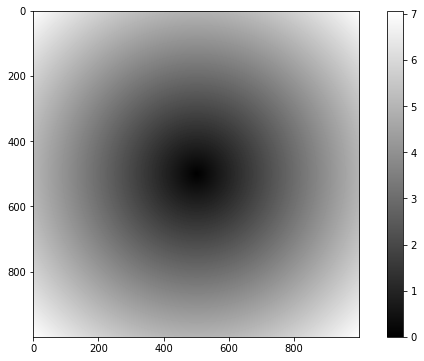

In [122]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

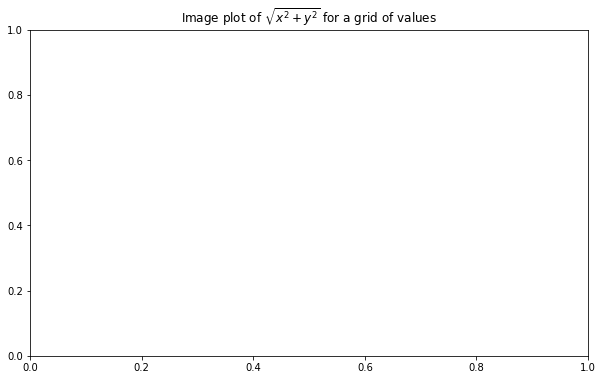

In [123]:
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [124]:
plt.draw()

<Figure size 720x432 with 0 Axes>

In [125]:
plt.close('all')

### 4.3.1 Expressing Conditional Logic as Array Operations(배열 연산으로 조건절 표현하기)

In [126]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [127]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [128]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [131]:
arr = np.random.randn(4, 4)
arr


array([[ 2.1695, -0.1149,  2.0037,  0.0296],
       [ 0.7953,  0.1181, -0.7485,  0.585 ],
       [ 0.1527, -1.5657, -0.5625, -0.0327],
       [-0.929 , -0.4826, -0.0363,  1.0954]])

In [133]:
arr > 0


array([[ True, False,  True,  True],
       [ True,  True, False,  True],
       [ True, False, False, False],
       [False, False, False,  True]])

In [134]:
np.where(arr > 0, 2, -2)

array([[ 2, -2,  2,  2],
       [ 2,  2, -2,  2],
       [ 2, -2, -2, -2],
       [-2, -2, -2,  2]])

In [130]:
np.where(arr > 0, 2, arr) # 양수인 경우에만 2를 대입한다.

array([[-0.5031, -0.6223, -0.9212, -0.7262],
       [ 2.    ,  2.    , -1.1577,  2.    ],
       [ 2.    ,  2.    ,  2.    , -0.9975],
       [ 2.    , -0.1316,  2.    ,  2.    ]])

### 4.3.2 Mathematical and Statistical Methods(수학 메서드와 통계 메서드)

In [135]:
arr = np.random.randn(5, 4)
arr

array([[ 0.9809, -0.5895,  1.5817, -0.5287],
       [ 0.457 ,  0.93  , -1.5693, -1.0225],
       [-0.4028,  0.2205, -0.1934,  0.6692],
       [-1.649 , -2.2528, -1.1668,  0.3536],
       [ 0.7021, -0.2746, -0.1391,  0.1077]])

In [136]:
arr.mean()

-0.18929574532046803

In [137]:
np.mean(arr)

-0.18929574532046803

In [138]:
arr.sum()

-3.7859149064093605

In [139]:
arr.mean(axis=1)

array([ 0.3611, -0.3012,  0.0734, -1.1788,  0.099 ])

In [140]:
arr.sum(axis=0)

array([ 0.0882, -1.9664, -1.4869, -0.4208])

In [141]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [142]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [143]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [144]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

- 기본 배열 통계 메서드
> - sum : 모든 원소의 합 계산
> - mean : 산술 평균. 크기가 0인 배열에 대한 mean 결과는 NaN
> - std, var : 표준편차, 분산
> - min, max : 최솟값과 최댓값
> - argmin, argmax : 최소 원소의 색인값과 최대 원소의 색인값
> - cumsum : 각 원소의 누적합
> - cumprod : 각 원소의 누적곱

### 4.3.3 Methods for Boolean Arrays(불리언 배열을 위한 메서드)
- 이전 메서드의 불리언 값을 1(True)또는 0(False)로 강제할 수 있다.

In [145]:
arr = np.random.randn(100)
(arr > 0).sum() # 양수인 원소의 개수

44

In [147]:
bools = np.array([False, False, True, False])
bools.any()
# 하나 이상의 값이 True인지 검사

True

In [148]:
bools.all()
# 모든 원소가 True인지 검사

False

### 4.3.4 Sorting(정렬)

In [149]:
arr = np.random.randn(6)
arr

array([ 0.0909, -0.3501,  0.218 , -0.8948, -1.7415, -1.0523])

In [150]:
arr.sort()
arr

array([-1.7415, -1.0523, -0.8948, -0.3501,  0.0909,  0.218 ])

In [151]:
arr = np.random.randn(5, 3)
arr

array([[ 1.4366, -0.5762, -2.4203],
       [-1.0623,  0.2374,  0.001 ],
       [ 0.0653, -1.3675, -0.0303],
       [ 0.9405, -0.6424,  1.0402],
       [-1.0829,  0.4292, -0.2362]])

In [152]:
arr.sort(1)
arr

array([[-2.4203, -0.5762,  1.4366],
       [-1.0623,  0.001 ,  0.2374],
       [-1.3675, -0.0303,  0.0653],
       [-0.6424,  0.9405,  1.0402],
       [-1.0829, -0.2362,  0.4292]])

- 분위수를 구하는 쉽고 빠른 방법은 배열을 정렬 후 특정 분위의 값을 선택

In [153]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% 분위수

-1.5308984278773312

### 4.3.5 Unique and Other Set Logic(집합 관련 함수)

In [154]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [156]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [157]:
np.unique(ints)

array([1, 2, 3, 4])

In [158]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [160]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])
# np.in1d 함수는 두 개의 배열을 인자로 받아서 첫 번째 배열의 원소가 두 번째 배열의 원소를 포함하는지 불리언 배열 반환.

array([ True, False, False,  True,  True, False,  True])

- 배열 집합 연산
> - unique(x) : 배열 x에서 중복된 원소를 제거한 뒤 정렬하여 반환한다.
> - intersect1d(x,y) : 배열 x와 y에 공통적으로 존재하는 원소를 정렬하여 반환한다.
> - union1d(x,y) : 두 배열의 합집합을 반환한다.
> - in1d(x,y) :  x의 원소가 y의 원소에 포함되는지 나타내는 불리언 배열을 반환한다.
> - setdiff1d(x,y) : x와 y의 차집합을 반환한다.
> - setxor1d(x,y) : 한 배열에는 포함되지만 두 배열 모두에는 포함되지 않는 원소들의 집합인 대칭차집합을 반환한다. 

## 4.4 File Input and Output with Arrays(배열 데이터의 파일 입출력)

In [164]:
arr = np.arange(10)
np.save('some_array', arr)
# 저장되는 파일 경로가 .npy로 끝나지 않으면 자동적으로 확장자가 추가

In [162]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [165]:
np.savez('array_archive.npz', a=arr, b=arr)

In [166]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [168]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)
# 압축이 잘 되는 형식의 데이터는 numpy.savez_compressed.npz 사용

In [169]:
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

## 4.5 Linear Algebra(선형대수)

In [170]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [171]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

- x.dot(y)와 np.dot(x, y)는 동일

In [172]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [173]:
x @ np.ones(3)

array([ 6., 15.])

In [174]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)

array([[ 0.6801, -0.5126, -0.2531, -0.1975,  0.0237],
       [-0.5126,  1.1921,  0.0882,  0.4402, -0.1589],
       [-0.2531,  0.0882,  0.4146, -0.0156, -0.3485],
       [-0.1975,  0.4402, -0.0156,  0.3972,  0.1822],
       [ 0.0237, -0.1589, -0.3485,  0.1822,  1.2704]])

In [175]:
mat.dot(inv(mat))

array([[ 1.,  0.,  0., -0., -0.],
       [-0.,  1.,  0.,  0., -0.],
       [-0.,  0.,  1.,  0., -0.],
       [ 0.,  0., -0.,  1.,  0.],
       [-0.,  0.,  0.,  0.,  1.]])

In [176]:
q, r = qr(mat)
r

array([[-4.5136, -2.6965, -5.1368,  1.6015, -2.0357],
       [ 0.    , -2.6335,  0.1481,  5.4344, -1.1801],
       [ 0.    ,  0.    , -2.7088,  0.6367, -1.0044],
       [ 0.    ,  0.    ,  0.    , -1.5946,  0.2086],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.7465]])

- numpy.linalg 함수
> - diag : 정사각 행렬의 대각/비대각 원소를 1차원 배열로 반환하거나, 1차원 배열을 대각선 원소로 하고 나머지는 0으로 채운 단위행렬을 반환.
> - dot : 행렬 곱셈 
> - trace : 행렬의 대각선 원소의 합을 계산한다.
> - det : 행렬식을 계산한다.
> - eig : 정사각 행렬의 고윳값과 고유벡터를 계산한다.
> - inv : 정사각 행렬의 역행렬을 계산한다.
> - pinv : 정사각 행렬의 무어-펜로즈 유사역원 역행렬을 구한다.
> - qr : QR 분해를 계산.
> - svd : 특잇값 분해(SVD)를 계산.
> - solve : A가 정사각 행렬일 때 Ax=b를 만족하는 x를 구한다.
> - lstsq : Ax=b를 만족하는 최소제곱해를 구한다.


## 4.6 Pseudorandom Number Generation(난수 생성)

In [177]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 1.9562, -0.2912,  0.1048,  0.1396],
       [-0.2841, -0.7082,  2.4632,  0.2175],
       [-0.0106, -0.006 ,  0.4901, -0.2772],
       [-0.7072, -0.5601,  2.7355,  0.9273]])

In [178]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

845 ms ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
40.5 ms ± 322 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


- numpy.random은 매우 큰 표본을 생성하는데 파이썬 내장 모듈보다 수십 배 이상 빠르다. 
- '유사 난수'라고 한다. 난수 생성기의 '시드값'에 따라 정해진 난수를 알고리즘으로 생성하기 때문이다.

In [182]:
np.random.seed(1234)
# 난수 생성기의 시드값은 np.random.seed를 이용해서 변경 가능.

In [181]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.4714, -1.191 ,  1.4327, -0.3127, -0.7206,  0.8872,  0.8596,
       -0.6365,  0.0157, -2.2427])

- numpy.random 함수
> - seed : 난수 생성기의 시드를 지정한다.
> - permutation : 순서를 임의로 바꾸거나 임의의 순열을 반환한다.
> - shuffle : 리스트나 배열의 순서를 뒤섞는다.
> - rand : 균등분포에서 표본을 추출한다.
> - randint : 주어진 최소/최대 범위 안에서 임의의 난수를 추출한다.
> - randn : 표준편차가 1이고 평균값이 0인 정규분포에서 표본을 추출한다.
> - binomial : 이항분포에서 표본을 추출한다.
> - nomal : 정규분포(가우시안)에서 표본을 추출한다.
> - beta : 베타분포에서 표본을 추출한다.
> - chisquare : 카이제곱분포에서 표본을 추출한다.
> - gamma : 감마분포에서 표본을 추출한다.
> - uniform : 균등 (0,1) 분포에서 표본을 추출한다.

## 4.7 Example: Random Walks(계단 오르내리기 예제)

In [183]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [184]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

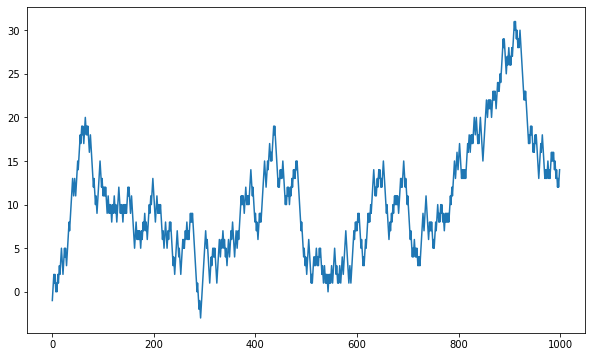

In [190]:
plt.plot(walk[:1000])

In [191]:
np.random.seed(12345)

In [192]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [193]:
walk.min()
walk.max()

31

In [194]:
(np.abs(walk) >= 10).argmax()
# 불리언 배열에서 최댓값의 처음 색인을 반환하는 argmax

37

### 4.7.1 Simulating Many Random Walks at Once(한 번에 시뮬레이션하기)

In [195]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]])

In [197]:
walks.max()

138

In [198]:
walks.min()

-133

In [200]:
hits30 = (np.abs(walks) >= 30).any(1)
# 누적합이 30 혹은 -30이 되는 최소 시점 계산 => any 메서드 이용
hits30

array([False,  True, False, ..., False,  True, False])

In [201]:
hits30.sum() # Number that hit 30 or -30(누적합이 30 또는 - 30이 되는 경우의 수)

3410

In [202]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

In [ ]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))

## Conclusion